# Import der notwendigen Module


- ``tensorflow`` für das Neuronale Netzwerk
- ``tensorflow_datasets`` für den Datensatz

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

KeyboardInterrupt: 

# Laden des Datensatzes

In [19]:
classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']
 
trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

### Show properties of the dataset
- import matplotlob for displaying the images

In [20]:
import matplotlib.pyplot as plt

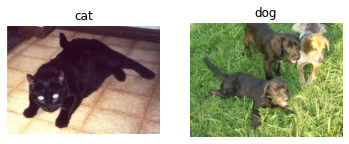

In [21]:
i = 0
fig, ax = plt.subplots(1, 2)
for image, label in testDataset.take(2):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

### Data Preprocessing
- Die Bilder Brauchen eine einheitliche Größe, damit das Neuronale Netzwerk darauf konfiguriert werden kann.

Hierfür definieren wir ein Funktion die über die Daten iteriert und alle bilder auf die Gleiche `Höhe` und `Breite` skaliert

In [22]:
HEIGHT: int = 200 # pixel
WIDTH: int = 200 # pixel

def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]), label

In [23]:
trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

## Erstellen des Neuronalen Netzwerks

In [24]:
from tensorflow import keras

In [25]:
def get_model():
    model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
 
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Traininer des Models

- das Modell wird trainiert und die Trainingshistorie wird gespeichert

In [26]:
model = get_model()
train_history = model.fit(trainDataset, epochs=10, validation_data=testDataset)

Epoch 1/10
509/509 [==============================] - 380s 745ms/step - loss: 7.7466 - accuracy: 0.6345 - val_loss: 0.6087 - val_accuracy: 0.6803
Epoch 2/10
509/509 [==============================] - 378s 742ms/step - loss: 0.5175 - accuracy: 0.7441 - val_loss: 0.6061 - val_accuracy: 0.6838
Epoch 3/10
509/509 [==============================] - 384s 754ms/step - loss: 0.3808 - accuracy: 0.8234 - val_loss: 0.7382 - val_accuracy: 0.6740
Epoch 4/10
509/509 [==============================] - 364s 715ms/step - loss: 0.3282 - accuracy: 0.8559 - val_loss: 0.7382 - val_accuracy: 0.6757
Epoch 5/10
509/509 [==============================] - 347s 682ms/step - loss: 0.3002 - accuracy: 0.8732 - val_loss: 0.8915 - val_accuracy: 0.6653
Epoch 6/10
509/509 [==============================] - 414s 813ms/step - loss: 0.2360 - accuracy: 0.9047 - val_loss: 0.9980 - val_accuracy: 0.6614
Epoch 7/10
509/509 [==============================] - 476s 935ms/step - loss: 0.1912 - accuracy: 0.9266 - val_loss: 1.2638 -